<h3>Задание 5. Линейное программирование. Графический метод</h3><br>Вариант 6

In [1]:
import numpy as np
from scipy.optimize import minimize, LinearConstraint, Bounds
import sympy as sym
import matplotlib.pyplot as plt

In [2]:
a = -0.25
b = 10
c = 2

In [3]:
def f(xy):
    x, y = xy
    return -(x + a * y)

def gr(xy):
    x, y = xy
    
    der = np.zeros_like(xy)
    der[0] = -1
    der[1] = -a
    
    return der

In [4]:
#Вводим ограничения
linear_constraints = [LinearConstraint([1, 2], -np.inf, 10),
                      LinearConstraint([3, 2], -np.inf, 18),
                      LinearConstraint([1, -1], -b, np.inf),
                      LinearConstraint([c, -1], -np.inf, 8*c + 3)]
x0 = np.array([1.0, 1.0])
res = minimize(f, x0, jac=gr, constraints=linear_constraints, options={'disp': True})

u = res.x[0]
v = res.x[1]
F_max = -res.fun
print(res.x)

Optimization terminated successfully    (Exit mode 0)
            Current function value: -8.750000000000243
            Iterations: 5
            Function evaluations: 5
            Gradient evaluations: 5
[ 8. -3.]


In [5]:
print(f'Оптимальные значения: x = {u.round(3)}, y = {v.round(3)}')
print('Max значение функции:',F_max.round(3))

Оптимальные значения: x = 8.0, y = -3.0
Max значение функции: 8.75


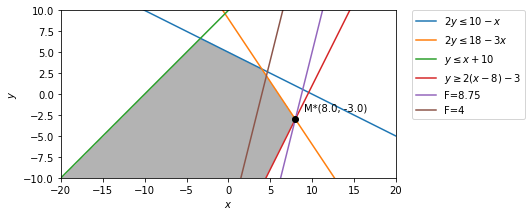

In [6]:
#графическое решение

d = np.linspace(-20,20,300)
x,y = np.meshgrid(d,d)

plt.imshow( ((2*y<=10-x) & (2*y<=18-3*x) & (y<=x+b) & (y>=c*x-8*c-3)).astype(int), 
                extent=(x.min(),x.max(),y.min(),y.max()),origin="lower",
                cmap="Greys", alpha = 0.3);

x = np.linspace(-20, 20, 2000)

#ограничения D
y1 = (10-x)/2.0 
y2 = (18-3*x)/2.0
y3 = x + b
y4 = c*x - 8*c - 3

# y = F(x, y)/a - x/a
y5 = F_max/a - x/a
y6 = 4/a - x/a

plt.plot(x, y1, label=r'$2y\leq 10-x$')
plt.plot(x, y2, label=r'$2y\leq 18-3x$')
plt.plot(x, y3, label=fr'$y\leq x + {b}$')
plt.plot(x, y4, label=fr'$y\geq {c}(x-8)-3$')

plt.plot(x, y5, label=f'F={F_max.round(3)}')
plt.plot(x, y6, label='F=4')

plt.xlim(-20,20)
plt.ylim(-10,10)

plt.plot(u, v, 'ko')
plt.text(u + 1, v + 1, f'M*({u.round(3)}, {v.round(3)})')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

plt.show()

Ответ: M* = (8, 3) F max = 8.75